# 서울시 골목상권 월매출액 예측

## 실험1 회귀분석 모델 비교

- 1)상권코드 2)시군구로 각각 분류시 가장 성능이 좋은 모델을 찾기위해 비교
- Cross Validation 10회 실시 후 비교
- Goal : RMSE를 최소화시키는 Regression 모델 찾기 


### 1.1 회귀분석(상권코드)

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('raw_data/df_grouped_rate.csv') 
y=df.iloc[:,3:4]
X= df.iloc[:,1:].drop(['sales_total','code'],axis=1)
X['district'] = X['district'].astype('object') 
X_dum = pd.get_dummies(X)

In [4]:
#OLS summary를 보기위해 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.2, random_state=0) # y 값이 정의되지 않아 df.sales_total 으로 대체하겠습니다.
# 로버스트 스케일링
rb = RobustScaler()
Xs_train = rb.fit_transform(X_train)
Xs_test = rb.transform(X_test)

model = sm.OLS(y_train, Xs_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_total   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     43.98
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        03:46:21   Log-Likelihood:            -2.0356e+06
No. Observations:               90612   AIC:                         4.073e+06
Df Residuals:                   89588   BIC:                         4.083e+06
Df Model:                        1023                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.911e+08   4.81e+06    102.135      0.0

In [6]:

from sklearn.ensemble import RandomForestRegressor
## kmeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import metrics
import numpy as np

In [7]:
from sklearn.metrics import r2_score
R2_lr = []
MAE_lr = []
MSE_lr = []
RMSE_lr = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.2) 

    # 로버스트 스케일링
    rb = RobustScaler()
    Xs_train = rb.fit_transform(X_train)
    Xs_test = rb.transform(X_test)

    # 회귀분석
    regressor = LinearRegression()
    model = regressor.fit(Xs_train, y_train)

    print(i+1,"번째 시도")

    # 오차 결과값
    y_pred = model.predict(Xs_test)
    R2_lr.append(r2_score(y_test , y_pred))
    MAE_lr.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_lr.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_lr.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)


1 번째 시도
2 번째 시도
3 번째 시도
4 번째 시도
5 번째 시도
6 번째 시도
7 번째 시도
8 번째 시도
9 번째 시도
10 번째 시도


In [8]:
print('R2_lr = ', np.mean(R2_lr))
print('MAE_lr = ', np.mean(MAE_lr))
print('MSE_lr = ', np.mean(MSE_lr))
print('RMSE_lr = ', np.mean(RMSE_lr))

R2_lr =  0.32789867153638513
MAE_lr =  716471449.2103916
MSE_lr =  1.9496208296994345e+18
RMSE_lr =  1395390438.827306


### 1.2 행정구역 + 회귀분석

In [0]:
df = pd.read_csv("df_grouped_rate.csv", encoding ='utf-8')
cgoongu = pd.read_csv("cgoongoo1.csv", encoding ='utf-8')
df_merged = pd.merge(df, cgoongu, on=['district'])
df_merged.drop(['district','year',], axis=1, inplace =True)

y=df_merged.iloc[:,1:2]
X= df_merged.drop(['sales_total'],axis=1)
X= X.iloc[:,1:]
# 더미변수화
X['cgoongoo'] = X['cgoongoo'].astype('object')
X_dum = pd.get_dummies(X)

In [17]:
#OLS summary를 보기위해 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.2, random_state=0) # y 값이 정의되지 않아 df.sales_total 으로 대체하겠습니다.
# 로버스트 스케일링
rb = RobustScaler()
Xs_train = rb.fit_transform(X_train.iloc[:,:17])
Xs_train = np.hstack((Xs_train, X_train.iloc[:,17:]))

Xs_test = rb.transform(X_test.iloc[:,:17])
Xs_test = np.hstack((Xs_test, X_test.iloc[:,17:]))
model = sm.OLS(y_train, Xs_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_total   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     937.4
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:46:23   Log-Likelihood:            -2.0381e+06
No. Observations:               90612   AIC:                         4.076e+06
Df Residuals:                   90570   BIC:                         4.077e+06
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.928e+08   4.77e+06    103.377      0.0

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

R2_cgoongu = []
MAE_cgoongu = []
MSE_cgoongu = []
RMSE_cgoongu = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.2) 

    # 로버스트 스케일링
    rb = RobustScaler()
    Xs_train = rb.fit_transform(X_train)
    Xs_test = rb.transform(X_test)

    # 회귀분석
    regressor = LinearRegression()
    model = regressor.fit(Xs_train, y_train)

    print(i+1,"번째 시도")


    # 오차 결과값
    y_pred = model.predict(Xs_test)
    R2_cgoongu.append(r2_score(y_test , y_pred))
    MAE_cgoongu.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_cgoongu.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_cgoongu.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)


1 번째 시도
2 번째 시도
3 번째 시도
4 번째 시도
5 번째 시도
6 번째 시도
7 번째 시도
8 번째 시도
9 번째 시도
10 번째 시도


In [22]:
print('R2_cgoongu = ',R2_cgoongu)
print('MAE_cgoongu = ',MAE_cgoongu) 
print('MSE_cgoongu = ',MSE_cgoongu) 
print('RMSE_cgoongu = ',RMSE_cgoongu) 

R2_cgoongu =  [0.2800529839118193, 0.2924402157569912, 0.27124734660840133, 0.30362232308738113, 0.3218358556701477, 0.2915386976613953, 0.3328058082191604, 0.27614414725698067, 0.24734586517849533, 0.3134236995802423]
MAE_cgoongu =  [711002924.3671037, 706937739.2101709, 717639871.1812122, 697991246.0927912, 701311510.9747937, 700480528.8257184, 697380988.9046484, 718968500.8148148, 720375226.6985388, 715116623.7421534]
MSE_cgoongu =  [2.2593184946277975e+18, 2.043951543510374e+18, 2.1234639033651415e+18, 1.8562403659352097e+18, 1.7821270051635195e+18, 1.8041481334164498e+18, 1.7717015860117624e+18, 2.0290955353105725e+18, 2.14952432441543e+18, 2.2118555244137446e+18]
RMSE_cgoongu =  [1503102955.4317954, 1429668333.3942785, 1457211001.6621277, 1362439123.7538688, 1334963297.309525, 1343185814.9252656, 1331052811.1280043, 1424463244.6330698, 1466125616.8607893, 1487230824.1876056]


### 1.3 상권코드 + Random Forest

In [0]:
import pandas as pd 
df = pd.read_csv('df_grouped_rate.csv') #폴더 위치는 상이할 수 있음

# 더미변수화
y=df.iloc[:,3:4]
X= df.iloc[:,1:].drop(['sales_total','code'],axis=1)
X['district'] = X['district'].astype('object') 
# X_dum = pd.get_dummies(X)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
R2_RF = []
MAE_RF = []
MSE_RF = []
RMSE_RF = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    Xs_train = X_train
    Xs_test = X_test
    regr = RandomForestRegressor(n_estimators=50,max_depth=20, n_jobs=-1)
    model=regr.fit(Xs_train, y_train)
    y_pred=model.predict(Xs_test)
    
    print(i+1,"번째 시도")


    # 오차 결과값
    R2_RF.append(r2_score(y_test , y_pred))
    MAE_RF.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_RF.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_RF.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


2 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


3 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


4 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


5 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


6 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


7 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


8 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


9 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


10 번째 시도


In [25]:
print('R2_RF = ', np.mean(R2_RF)) 
print('MAE_RF = ', np.mean(MAE_RF)) 
print('MSE_RF = ', np.mean(MSE_RF)) 
print('RMSE_RF = ', np.mean(RMSE_RF)) 

# import pickle
# with open('pkl_files/R2_lr.pkl', 'wb') as f:
#     pickle.dump(R2_lr, f) #피클파일 저장
# with open('pkl_files/MAE_lr.pkl', 'wb') as f:
#     pickle.dump(MAE_lr, f) #피클파일 저장
# with open('pkl_files/MSE_lr.pkl', 'wb') as f:
#     pickle.dump(MSE_lr, f) #피클파일 저장

# with open('pkl_files/RMSE_lr.pkl', 'wb') as f:
#     pickle.dump(RMSE_lr, f) #피클파일 저장

R2_RF =  0.6032588270439464
MAE_RF =  504713072.0812538
MSE_RF =  1.1410823156036175e+18
RMSE_RF =  1067392394.9889349


### 1.4 행정구역 + Random Forest

In [0]:
import pandas as pd

df = pd.read_csv("df_grouped_rate.csv", encoding ='utf-8')
cgoongu = pd.read_csv("cgoongoo1.csv", encoding ='utf-8')
df_merged = pd.merge(df, cgoongu, on=['district'])
df_merged.drop(['district','year'], axis=1, inplace =True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
y=df_merged.iloc[:,1:2]
X= df_merged.drop(['sales_total','code'],axis=1)
X['cgoongoo'] = X['cgoongoo'].astype('object') 

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np 

R2_RF_c = []
MAE_RF_c = []
MSE_RF_c = []
RMSE_RF_c = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    Xs_train = X_train
    Xs_test = X_test
    regr = RandomForestRegressor(n_estimators=50,max_depth=20, n_jobs=-1)
    model=regr.fit(Xs_train, y_train)
    y_pred=model.predict(Xs_test)
    
    print(i+1,"번째 시도")


    # 오차 결과값
    R2_RF_c.append(r2_score(y_test , y_pred))
    MAE_RF_c.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_RF_c.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_RF_c.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


2 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


3 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


4 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


5 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


6 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


7 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


8 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


9 번째 시도


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


10 번째 시도


In [30]:
print(R2_RF_c) 
print(MAE_RF_c) 
print(MSE_RF_c) 
print(RMSE_RF_c) 

# import pickle
# with open('pkl_files/R2_RF_c.pkl', 'wb') as f:
#     pickle.dump(R2_RF_c, f) #피클파일 저장
# with open('pkl_files/MAE_RF_c.pkl', 'wb') as f:
#     pickle.dump(MAE_RF_c, f) #피클파일 저장
# with open('pkl_files/MSE_RF_c.pkl', 'wb') as f:
#     pickle.dump(MSE_RF_c, f) #피클파일 저장

# with open('pkl_files/RMSE_RF_c.pkl', 'wb') as f:
#     pickle.dump(RMSE_RF_c, f) #피클파일 저장

[0.629745192624146, 0.5987540837175724, 0.5633913228605665, 0.6294491185134319, 0.5962725683174561, 0.6112073354773286, 0.622165788870619, 0.5873248107150721, 0.6077647301656575, 0.5927035718577709]
[499757140.75123394, 501522890.72771776, 499387574.76129776, 500069404.00489557, 508849602.5480255, 499222984.59689, 505310597.07044196, 501911172.52783567, 508186287.9213654, 517403869.90484977]
[1.0068594290783607e+18, 1.0707938791849396e+18, 1.2159105195282217e+18, 1.0203114481421619e+18, 1.1158897992469216e+18, 1.1443931429021539e+18, 1.0857365096093307e+18, 1.0636204309694729e+18, 1.1270466833169713e+18, 1.3141920083045443e+18]
[1003423853.1539704, 1034791708.115667, 1102683326.9475973, 1010104671.8742379, 1056356852.2269932, 1069763124.669267, 1041986808.7501544, 1031319752.0504845, 1061624549.1307043, 1146382138.863191]


### 1.5 상권코드 + LightGBM

In [0]:
import pandas as pd 
df = pd.read_csv('df_grouped_rate.csv') #폴더 위치는 상이할 수 있음
y=df.iloc[:,3:4]
X= df.iloc[:,1:].drop(['sales_total','code'],axis=1)
X['district'] = X['district'].astype('object')

# # 더미변수화
X = pd.get_dummies(X)  


In [32]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
R2_lgb_gbdt = []
MAE_lgb_gbdt = []
MSE_lgb_gbdt = []
RMSE_lgb_gbdt = []
for i in range(10):
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3)

    train_ds = lgb.Dataset(train_x, label = train_y) 
    test_ds = lgb.Dataset(test_x, label = test_y) 
   
  #파라미터 설정
    params = {'learning_rate': 0.8, 
              'max_depth': 16, 
              'boosting': 'gbdt', 
              'objective': 'regression', 
              'metric': 'mse', 
              'is_training_metric': True, 
              'feature_fraction': 0.9, 
              'bagging_fraction': 0.7, 
              'bagging_freq': 5, 
              'device': 'cpu'
             }
    # 훈련
    model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=800)
#     predict_train = model.predict(train_x)
    y_pred = model.predict(test_x)
    print(i+1,"번째 시도")

    # 오차 결과값
    R2_lgb_gbdt.append(r2_score(test_y , y_pred))
    MAE_lgb_gbdt.append(metrics.mean_absolute_error(test_y, y_pred))
    MSE_lgb_gbdt.append(metrics.mean_squared_error(test_y, y_pred))
    RMSE_lgb_gbdt.append(np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
    print('='*50)
    print('='*50)


Training until validation scores don't improve for 800 rounds.
[100]	valid_0's l2: 1.47859e+18
[200]	valid_0's l2: 1.52953e+18
[300]	valid_0's l2: 1.54159e+18
[400]	valid_0's l2: 1.56955e+18
[500]	valid_0's l2: 1.59667e+18
[600]	valid_0's l2: 1.61835e+18
[700]	valid_0's l2: 1.63566e+18
[800]	valid_0's l2: 1.64708e+18
Early stopping, best iteration is:
[48]	valid_0's l2: 1.41143e+18
1 번째 시도
Training until validation scores don't improve for 800 rounds.
[100]	valid_0's l2: 1.45059e+18
[200]	valid_0's l2: 1.48065e+18
[300]	valid_0's l2: 1.50168e+18
[400]	valid_0's l2: 1.52293e+18
[500]	valid_0's l2: 1.55195e+18
[600]	valid_0's l2: 1.56906e+18
[700]	valid_0's l2: 1.58403e+18
[800]	valid_0's l2: 1.5985e+18
Early stopping, best iteration is:
[15]	valid_0's l2: 1.38417e+18
2 번째 시도
Training until validation scores don't improve for 800 rounds.
[100]	valid_0's l2: 1.39677e+18
[200]	valid_0's l2: 1.42905e+18
[300]	valid_0's l2: 1.47707e+18
[400]	valid_0's l2: 1.51447e+18
[500]	valid_0's l2: 1.53

In [35]:
print('R2_lgb_gbdt = ', R2_lgb_gbdt) 
print('MAE_lgb_gbdt = ', MAE_lgb_gbdt) 
print('MSE_lgb_gbdt = ', MSE_lgb_gbdt) 
print('RMSE_lgb_gbdt = ', RMSE_lgb_gbdt) 

R2_lgb_gbdt =  [0.512921563312493, 0.45033040225302867, 0.512507281866061, 0.4865943244332873, 0.48988274185081926, 0.48635717574733406, 0.47035885775021646, 0.5071943092060736, 0.4812138285561901, 0.4860304434021987]
MAE_lgb_gbdt =  [602840581.1521478, 583329854.3899527, 589644562.0359671, 616137372.4527394, 631849887.3674842, 582026602.9390355, 582721488.0842714, 615646485.5525836, 613278173.0324283, 623399668.7622703]
MSE_lgb_gbdt =  [1.4114258974192768e+18, 1.384167855465759e+18, 1.3720320884844434e+18, 1.6147270198004396e+18, 1.3765127675855698e+18, 1.4049403191868774e+18, 1.3242838009945208e+18, 1.3466124740162296e+18, 1.410418587265137e+18, 1.5217631364346084e+18]
RMSE_lgb_gbdt =  [1188034468.1107855, 1176506632.1384504, 1171337734.5942729, 1270719095.551979, 1173248808.9001284, 1185301784.0140448, 1150775304.303373, 1160436329.1521986, 1187610452.6590934, 1233597639.6032088]


### 1.6  행정구역 + LightGBM

In [0]:
import pandas as pd 
df = pd.read_csv("df_grouped_rate.csv", encoding ='utf-8')
cgoongu = pd.read_csv("cgoongoo1.csv", encoding ='utf-8')
df_merged = pd.merge(df, cgoongu, on=['district'])
df_merged.drop(['district','year'], axis=1, inplace =True)

y=df_merged.iloc[:,1:2]
X= df_merged.drop(['sales_total','code'],axis=1)

X= X.iloc[:,1:]


X['cgoongoo'] = X['cgoongoo'].astype('object')
# # 더미변수화
X = pd.get_dummies(X)  

In [38]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
R2_lgb_gbdt_c = []
MAE_lgb_gbdt_c = []
MSE_lgb_gbdt_c = []
RMSE_lgb_gbdt_c = []
for i in range(10):
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3)


#     model = lgb.LGBMClassifier(n_estimators=100, max_depth=1, random_state=0)
   # 데이터셋으로 변환
    train_ds = lgb.Dataset(train_x, label = train_y) 
    test_ds = lgb.Dataset(test_x, label = test_y) 
   
  #파라미터 설정
    params = {'learning_rate': 0.8, 
              'max_depth': 16, 
              'boosting': 'gbdt', 
              'objective': 'regression', 
              'metric': 'mse', 
              'is_training_metric': True, 
              'feature_fraction': 0.9, 
              'bagging_fraction': 0.7, 
              'bagging_freq': 5, 
              'device': 'cpu'
             }
    # 훈련
    model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=800)
#     predict_train = model.predict(train_x)
    y_pred = model.predict(test_x)
    print(i+1,"번째 시도")

    # 오차 결과값
    R2_lgb_gbdt_c.append(r2_score(test_y , y_pred))
    MAE_lgb_gbdt_c.append(metrics.mean_absolute_error(test_y, y_pred))
    MSE_lgb_gbdt_c.append(metrics.mean_squared_error(test_y, y_pred))
    RMSE_lgb_gbdt_c.append(np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
    print('='*50)
    print('='*50)


Training until validation scores don't improve for 800 rounds.
[100]	valid_0's l2: 1.85087e+18
[200]	valid_0's l2: 1.96411e+18
[300]	valid_0's l2: 2.05371e+18
[400]	valid_0's l2: 2.11063e+18
[500]	valid_0's l2: 2.1695e+18
[600]	valid_0's l2: 2.2051e+18
[700]	valid_0's l2: 2.2426e+18
[800]	valid_0's l2: 2.26847e+18
Early stopping, best iteration is:
[19]	valid_0's l2: 1.73013e+18
1 번째 시도
Training until validation scores don't improve for 800 rounds.
[100]	valid_0's l2: 1.97731e+18
[200]	valid_0's l2: 2.1036e+18
[300]	valid_0's l2: 2.18033e+18
[400]	valid_0's l2: 2.24447e+18
[500]	valid_0's l2: 2.30943e+18
[600]	valid_0's l2: 2.35295e+18
[700]	valid_0's l2: 2.39499e+18
[800]	valid_0's l2: 2.42223e+18
Early stopping, best iteration is:
[20]	valid_0's l2: 1.82231e+18
2 번째 시도
Training until validation scores don't improve for 800 rounds.
[100]	valid_0's l2: 1.88458e+18
[200]	valid_0's l2: 1.98531e+18
[300]	valid_0's l2: 2.07598e+18
[400]	valid_0's l2: 2.14383e+18
[500]	valid_0's l2: 2.19396

In [39]:
print('R2_lgb_gbdt_c = ',R2_lgb_gbdt_c)
print('MAE_lgb_gbdt_c = ',MAE_lgb_gbdt_c)
print('MSE_lgb_gbdt_c = ',MSE_lgb_gbdt_c)
print('RMSE_lgb_gbdt_c = ',RMSE_lgb_gbdt_c)

R2_lgb_gbdt_c =  [0.3512283168024066, 0.3751234109539553, 0.3871928632990729, 0.36643302150445134, 0.32811359567296894, 0.3774831779090819, 0.3709854291262086, 0.36203992360473103, 0.3698479719188589, 0.35883074388551384]
MAE_lgb_gbdt_c =  [655569494.2781609, 659362154.9627415, 647666797.9653703, 638604039.1093667, 654425242.076514, 660340602.472248, 653431688.3455423, 657078921.8982797, 639717139.9291251, 663694130.2022824]
MSE_lgb_gbdt_c =  [1.730131967912565e+18, 1.8223065607078208e+18, 1.750275170446239e+18, 1.763625697626179e+18, 1.8614696996656737e+18, 1.8860821922295613e+18, 1.7031122260728604e+18, 1.818660913390375e+18, 1.7564647819536996e+18, 1.8401290659369682e+18]
RMSE_lgb_gbdt_c =  [1315344809.5129144, 1349928353.9165406, 1322979656.0968876, 1328015699.31465, 1364356881.3421485, 1373347076.3902187, 1305033419.52337, 1348577366.483056, 1325316860.963332, 1356513570.1263618]


In [0]:
import pickle
with open('pkl_files\\R2_cgoongu.pkl', 'rb') as f: 
    R2_cgoongu = pickle.load(f)
with open('pkl_files\\R2_cgoongu.pkl', 'rb') as f: 
    R2_cgoongu = pickle.load(f)
with open('pkl_files\\R2_lgb_gbdt.pkl', 'rb') as f: 
    R2_lgb_gbdt = pickle.load(f)
with open('pkl_files\\R2_lgb_gbdt_2.pkl', 'rb') as f: 
    R2_lgb_gbdt_2 = pickle.load(f)
with open('pkl_files\\R2_lgb_gbdt_c.pkl', 'rb') as f: 
    R2_lgb_gbdt_c = pickle.load(f)
with open('pkl_files\\R2_lgb_gbdt_c2.pkl', 'rb') as f: 
    R2_lgb_gbdt_c2 = pickle.load(f)
with open('pkl_files\\R2_lr.pkl', 'rb') as f: 
    R2_lr = pickle.load(f)
with open('pkl_files\\R2_RF.pkl', 'rb') as f: 
    R2_RF = pickle.load(f)
with open('pkl_files\\R2_RF_c.pkl', 'rb') as f: 
    R2_RF_c = pickle.load(f)
with open('pkl_files\\R2_lgb_gbdt3.pkl', 'rb') as f: 
    R2_lgb_gbdt3 = pickle.load(f)
    
    
with open('pkl_files\\MAE_cgoongu.pkl', 'rb') as f: 
    MAE_cgoongu = pickle.load(f)
with open('pkl_files\\MAE_lgb_gbdt.pkl', 'rb') as f: 
    MAE_lgb_gbdt = pickle.load(f)
with open('pkl_files\\MAE_lgb_gbdt_2.pkl', 'rb') as f: 
    MAE_lgb_gbdt_2 = pickle.load(f)
with open('pkl_files\\MAE_lgb_gbdt_c.pkl', 'rb') as f: 
    MAE_lgb_gbdt_c = pickle.load(f)
with open('pkl_files\\MAE_lgb_gbdt_c2.pkl', 'rb') as f: 
    MAE_lgb_gbdt_c2 = pickle.load(f)
with open('pkl_files\\MAE_lr.pkl', 'rb') as f: 
    MAE_lr = pickle.load(f)
with open('pkl_files\\MAE_RF.pkl', 'rb') as f: 
    MAE_RF = pickle.load(f)
with open('pkl_files\\MAE_RF_c.pkl', 'rb') as f: 
    MAE_RF_c = pickle.load(f)
with open('pkl_files\\MAE_lgb_gbdt3.pkl', 'rb') as f: 
    MAE_lgb_gbdt3 = pickle.load(f)
    
    
    
with open('pkl_files\\MSE_cgoongu.pkl', 'rb') as f: 
    MSE_cgoongu = pickle.load(f)
with open('pkl_files\\MSE_lgb_gbdt.pkl', 'rb') as f: 
    MSE_lgb_gbdt = pickle.load(f)
with open('pkl_files\\MSE_lgb_gbdt_2.pkl', 'rb') as f: 
    MSE_lgb_gbdt_2 = pickle.load(f)
with open('pkl_files\\MSE_lgb_gbdt_c.pkl', 'rb') as f: 
    MSE_lgb_gbdt_c = pickle.load(f)
with open('pkl_files\\MSE_lgb_gbdt_c2.pkl', 'rb') as f: 
    MSE_lgb_gbdt_c2 = pickle.load(f)
with open('pkl_files\\MSE_lr.pkl', 'rb') as f: 
    MSE_lr = pickle.load(f)
with open('pkl_files\\MSE_RF.pkl', 'rb') as f: 
    MSE_RF = pickle.load(f)
with open('pkl_files\\MSE_RF_c.pkl', 'rb') as f: 
    MSE_RF_c = pickle.load(f)
with open('pkl_files\\MSE_lgb_gbdt3.pkl', 'rb') as f: 
    MSE_lgb_gbdt3 = pickle.load(f)    
    
    

with open('pkl_files\\RMSE_cgoongu.pkl', 'rb') as f: 
    RMSE_cgoongu = pickle.load(f)
with open('pkl_files\\RMSE_lgb_gbdt.pkl', 'rb') as f: 
    RMSE_lgb_gbdt = pickle.load(f)
with open('pkl_files\\RMSE_lgb_gbdt_2.pkl', 'rb') as f: 
    RMSE_lgb_gbdt_2 = pickle.load(f)
with open('pkl_files\\RMSE_lgb_gbdt_c.pkl', 'rb') as f: 
    RMSE_lgb_gbdt_c = pickle.load(f)
with open('pkl_files\\RMSE_lgb_gbdt_c2.pkl', 'rb') as f: 
    RMSE_lgb_gbdt_c2 = pickle.load(f)
with open('pkl_files\\RMSE_lr.pkl', 'rb') as f: 
    RMSE_lr = pickle.load(f)
with open('pkl_files\\RMSE_RF.pkl', 'rb') as f: 
    RMSE_RF = pickle.load(f)
with open('pkl_files\\RMSE_RF_c.pkl', 'rb') as f: 
    RMSE_RF_c = pickle.load(f)
with open('pkl_files\\RMSE_lgb_gbdt3.pkl', 'rb') as f: 
    RMSE_lgb_gbdt3 = pickle.load(f)

with open('pkl_files\\R2_lr_s.pkl', 'rb') as f: 
    R2_lr_s = pickle.load(f)
with open('pkl_files\\MAE_lr_s.pkl', 'rb') as f: 
    MAE_lr_s = pickle.load(f)
with open('pkl_files\\MSE_lr_s.pkl', 'rb') as f: 
    MSE_lr_s = pickle.load(f)
with open('pkl_files\\RMSE_lr_s.pkl', 'rb') as f: 
    RMSE_lr_s = pickle.load(f)    
    
import pickle    
with open('pkl_files\\R2_HC2.pkl', 'rb') as f: 
    R2_HC2 = pickle.load(f)
with open('pkl_files\\MAE_HC2.pkl', 'rb') as f: 
    MAE_HC2 = pickle.load(f)
with open('pkl_files\\MSE_HC2.pkl', 'rb') as f: 
    MSE_HC2 = pickle.load(f)
with open('pkl_files\\RMSE_HC2.pkl', 'rb') as f: 
    RMSE_HC2 = pickle.load(f)
    
R2_k =  [0.3010486841388068, 0.2573063586482355, 0.26738912276864624, 0.2977569096536117, 0.2926221466864226, 0.26730441368083646, 0.291606128120118, 0.2998210344687421, 0.3016117642648646, 0.31131440507747987]
MAE_k =  [699625494.5392678, 707935314.0150232, 712652201.9400593, 701338241.9598005, 714425111.4063109, 711162482.080123, 708605847.6798493, 709222229.124304, 706597004.9721053, 709682717.3362817]
MSE_k =  [1.9462141858846446e+18, 1.9238838633603566e+18, 2.0519092883403553e+18, 1.8607943366000018e+18, 1.9987669135101965e+18, 2.1134141208493327e+18, 1.998376265991056e+18, 2.03291415357376e+18, 1.899194803848009e+18, 2.058265767786249e+18]
RMSE_k =  [1395067806.9128556, 1387041406.505356, 1432448703.5633616, 1364109356.5400107, 1413777533.2456646, 1453758618.4952896, 1413639369.143013, 1425802985.5396433, 1378112768.9155228, 1434665733.816156]


with open('pkl_files/MAEs_lr_t.pkl', 'rb') as f:
    MAEs_lr_t = pickle.load(f)
with open('pkl_files/MAEs_RF_t.pkl', 'rb') as f:
    MAEs_RF_t = pickle.load(f)
with open('pkl_files/MSEs_lr_t.pkl', 'rb') as f:
    MSEs_lr_t = pickle.load(f)
with open('pkl_files/MSEs_RF_t.pkl', 'rb') as f:
    MSEs_RF_t = pickle.load(f)
with open('pkl_files/MSE_lr_t.pkl', 'rb') as f:
    MSE_lr_t = pickle.load(f)
with open('pkl_files/MSE_RF_t.pkl', 'rb') as f:
    MSE_RF_t = pickle.load(f)
with open('pkl_files/R2s_lr_t.pkl', 'rb') as f:
    R2s_lr_t = pickle.load(f)
with open('pkl_files/R2s_RF_t.pkl', 'rb') as f:
    R2s_RF_t = pickle.load(f)
with open('pkl_files/R2_lr_t.pkl', 'rb') as f:
    R2_lr_t = pickle.load(f)
with open('pkl_files/R2_RF_t.pkl', 'rb') as f:
    R2_RF_t = pickle.load(f)
with open('pkl_files/RMSEs_lr_t.pkl', 'rb') as f:
    RMSEs_lr_t = pickle.load(f)
with open('pkl_files/RMSEs_RF_t.pkl', 'rb') as f:
    RMSEs_RF_t = pickle.load(f)
with open('pkl_files/RMSE_lr_t.pkl', 'rb') as f:
    RMSE_lr_t = pickle.load(f)
with open('pkl_files/RMSE_RF_t.pkl', 'rb') as f:
    RMSE_RF_t = pickle.load(f)

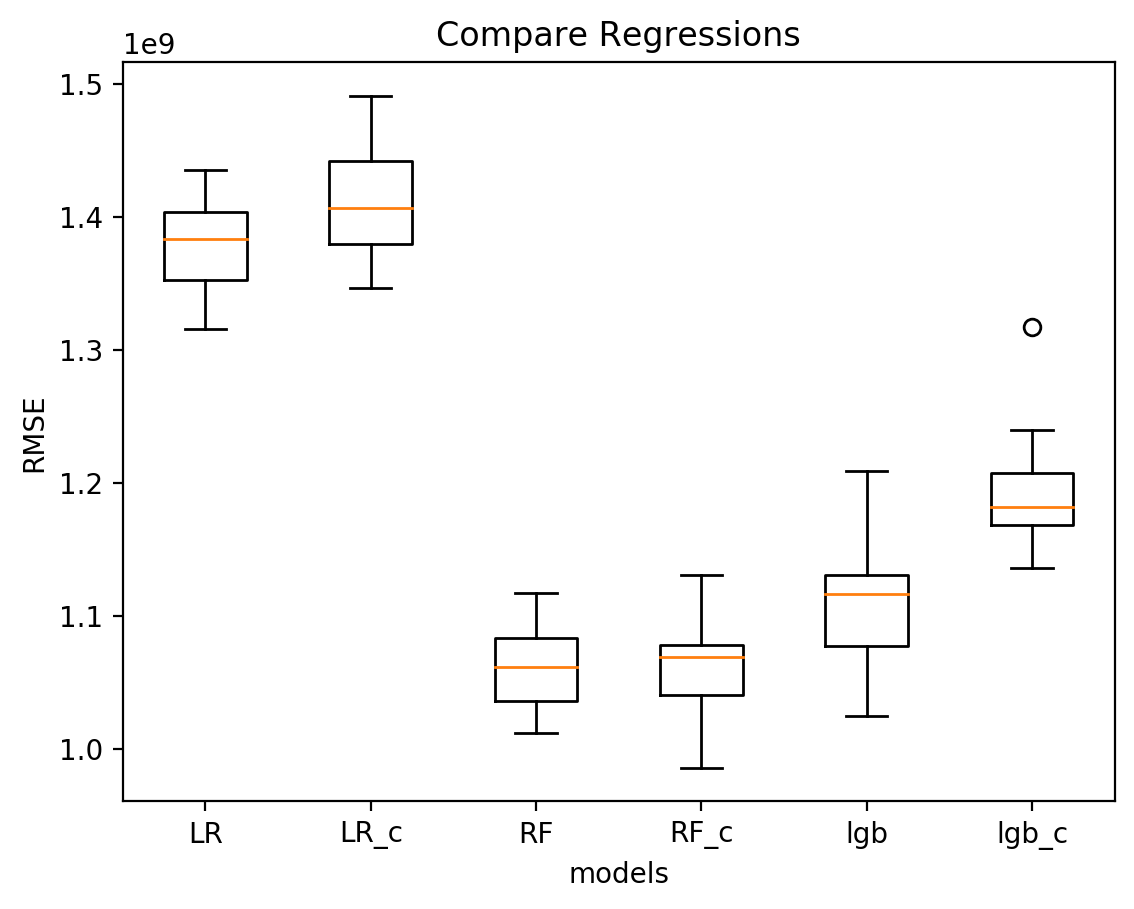

In [0]:
boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot(
    [
    RMSE_lr,
     RMSE_cgoongu,

     RMSE_RF,
     RMSE_RF_c,

     RMSE_lgb_gbdt,

     RMSE_lgb_gbdt_c,

     ]
    ,labels=[
     'LR',
     'LR_c',

     'RF',
     'RF_c',
 
     'lgb',  #2를 살렸지만 그래프에선 편의를 위해 2 생략

     'lgb_c',

 ]
    
    )


axes1.set_xlabel('models') 
axes1.set_ylabel('RMSE') 
axes1.set_title('Compare Regressions')
plt.style.use('default')
boxplot.savefig('compare_regressions.png', transparent=True) #png파일로 저장

plt.show()

----------------------------------------------------------------

## 실험2 클러스터링 분석

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [0]:
# 새 위치에서 실행 시 데이터 위치 주의
df = pd.read_csv('df_grouped_rate.csv') 

### 2.1 K-means 클러스터링 특징 찾기

### 불러온 dataframe에서 상권코드, 업종코드 및 연도 제거하기 / 독립 종속 변수 분리하기

In [0]:
y = df[['sales_total']]
X = df.drop(['sales_total', 'district', 'year', 'code'], axis=1)

### 실루엣 점수와 inertia 실행 소요 시간 확인

In [43]:
%%time
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
silhouette_score(X, kmeans.labels_)

CPU times: user 3min 3s, sys: 33.9 s, total: 3min 37s
Wall time: 2min 17s


In [44]:
%%time
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
kmeans.inertia_

CPU times: user 4.03 s, sys: 4.33 s, total: 8.36 s
Wall time: 2.81 s


### Inertia 그려서 '최적 군집 수' 대강의 위치 찾기

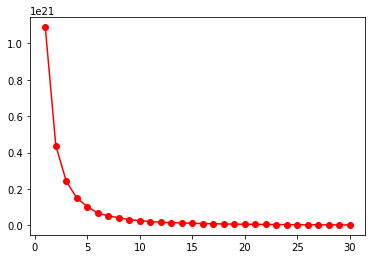

In [45]:
x = []
y = []
for i in range(1, 31):
    x.append(i)
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    y.append(kmeans.inertia_)
    
plt.plot(x, y, 'ro-')
plt.style.use('default')
plt.show()

### 군집 수 3으로 결정하고, Kmeans 실행

In [0]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
train_labels = kmeans.labels_

In [47]:
lb_df= pd.DataFrame(train_labels, columns=['labels'], dtype=str)
X_cl = pd.concat([lb_df, X], axis=1)
X_cl.tail()

,labels,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
113260,0,2.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.881982,0.513650,0.083578,0.108358,0.346493,0.395632,0.149517,0.0
113261,0,2.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.931167,0.474928,0.128200,0.262188,0.297561,0.325539,0.114712,0.0
113262,0,1.0,0,1,230,164052,179007,93.0,154040746.0,3256684.0,0.640979,0.320036,0.046238,0.006346,0.508613,0.275612,0.209429,0.0
113263,0,3.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.624137,0.374046,0.322065,0.225009,0.288986,0.227190,0.258815,0.0
113264,0,6.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.976623,0.800000,0.371429,0.000000,0.129870,0.166234,0.703896,0.0


In [48]:
# 군집별 데이터 갯수 확인
X_cl.groupby(by='labels').size()

labels
0    87703
1    23514
2     2048
dtype: int64

### 군집별 기술통계와 바이올린 플롯으로 데이터 확인

#### 배후지 아파트 평균가격

In [49]:
# # 17개 변수 중 배후지 아파트 평균 가격 - 군집별 기술통계

X_cl[['labels', X_cl.columns[8]]].groupby(by='labels').describe()

b_apt_avg_price                ...                            
                 count          mean  ...           75%           max
labels                                ...                            
0              87703.0  1.428734e+08  ...  1.641872e+08  2.175934e+08
1              23514.0  2.930017e+08  ...  3.334889e+08  4.626291e+08
2               2048.0  6.364709e+08  ...  6.836920e+08  1.318357e+09

[3 rows x 8 columns]

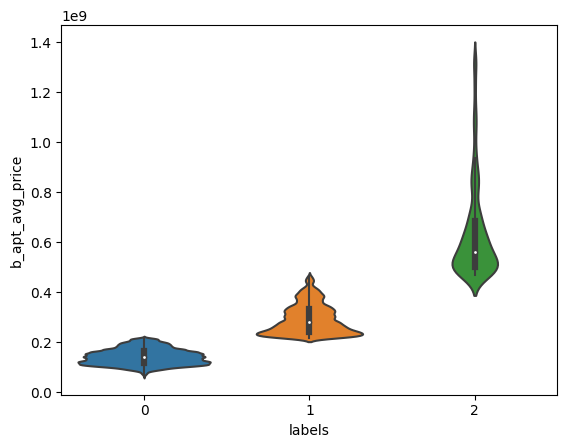

In [50]:
# 17개 변수 중 배후지 아파트 평균 가격 - 군집별 분포
sns.violinplot(x='labels', y=X_cl.columns[8], data=X_cl)
plt.style.use('default')
plt.show()

#### 배후지 월 평균 소득

In [51]:
# 17개 변수 중 배후지 월 평균 소득 - 군집별 기술통계
X_cl[['labels', X_cl.columns[9]]].groupby(by='labels').describe()

b_income_avg_monthly_inc                ...                        
                          count          mean  ...          75%        max
labels                                         ...                        
0                       87703.0  3.445343e+06  ...  3736356.000  6080675.0
1                       23514.0  4.515762e+06  ...  5024248.000  7417693.0
2                        2048.0  5.390793e+06  ...  5945470.125  6630464.0

[3 rows x 8 columns]

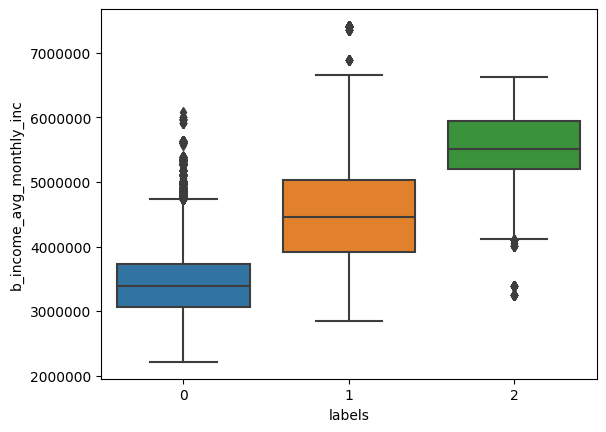

In [52]:
# 17개 변수 중 배후지 월 평균 소득 - 군집별 분포
sns.boxplot(x='labels', y=X_cl.columns[9], data=X_cl)
plt.show()

### 2.2 T-sne로 Clustering 결과 시각화

In [0]:
X=df[df.columns[4:]]
y=df["district"]
y=np.array(y)
X=np.array(X)

In [0]:
## KMEANS
from sklearn.cluster import KMeans
model = KMeans( n_clusters=25, random_state=0)
model.fit(X)
y_pred = model.labels_
y=model.fit(X)
y_pred_df= pd.DataFrame(y_pred, columns=['labels'], dtype=str)

In [0]:
## TSNE
df3= pd.read_csv('df4.csv',encoding='utf-8' )


In [0]:
df3.loc[:,'district'] = df3.district.astype(float)
y_pred_df= pd.DataFrame(y_pred, columns=['labels'], dtype=str)
X2 = pd.concat([y_pred_df, df3], axis=1)
X2.loc[:,'district'] = X2.district.astype(np.float)
X2.loc[:,'labels'] = X2.labels.astype(np.float)

### tsne데이터에 좌표값(상권코드,행정구, 시군구) 추가

In [57]:
maps = pd.read_csv('maps.csv',encoding='utf-8')
X2.columns=["labels","district","x_tsne","y_tsne"]
maps2=maps[["상권_코드","엑스좌표_값","와이좌표_값","시군구_코드","행정동_코드"]]
maps2.columns=["district","xmap","ymap","C","H"]
np.unique(maps2['district'])

X2.loc[:,'district'] = X2.district.astype('int64')
maps2.loc[:,'district'] = maps2.district.astype('int64')
df_final = pd.merge(X2, maps2, on=['district'])
df_final.loc[:,'district'] = df_final.district.astype('int64')


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


### Visualization

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


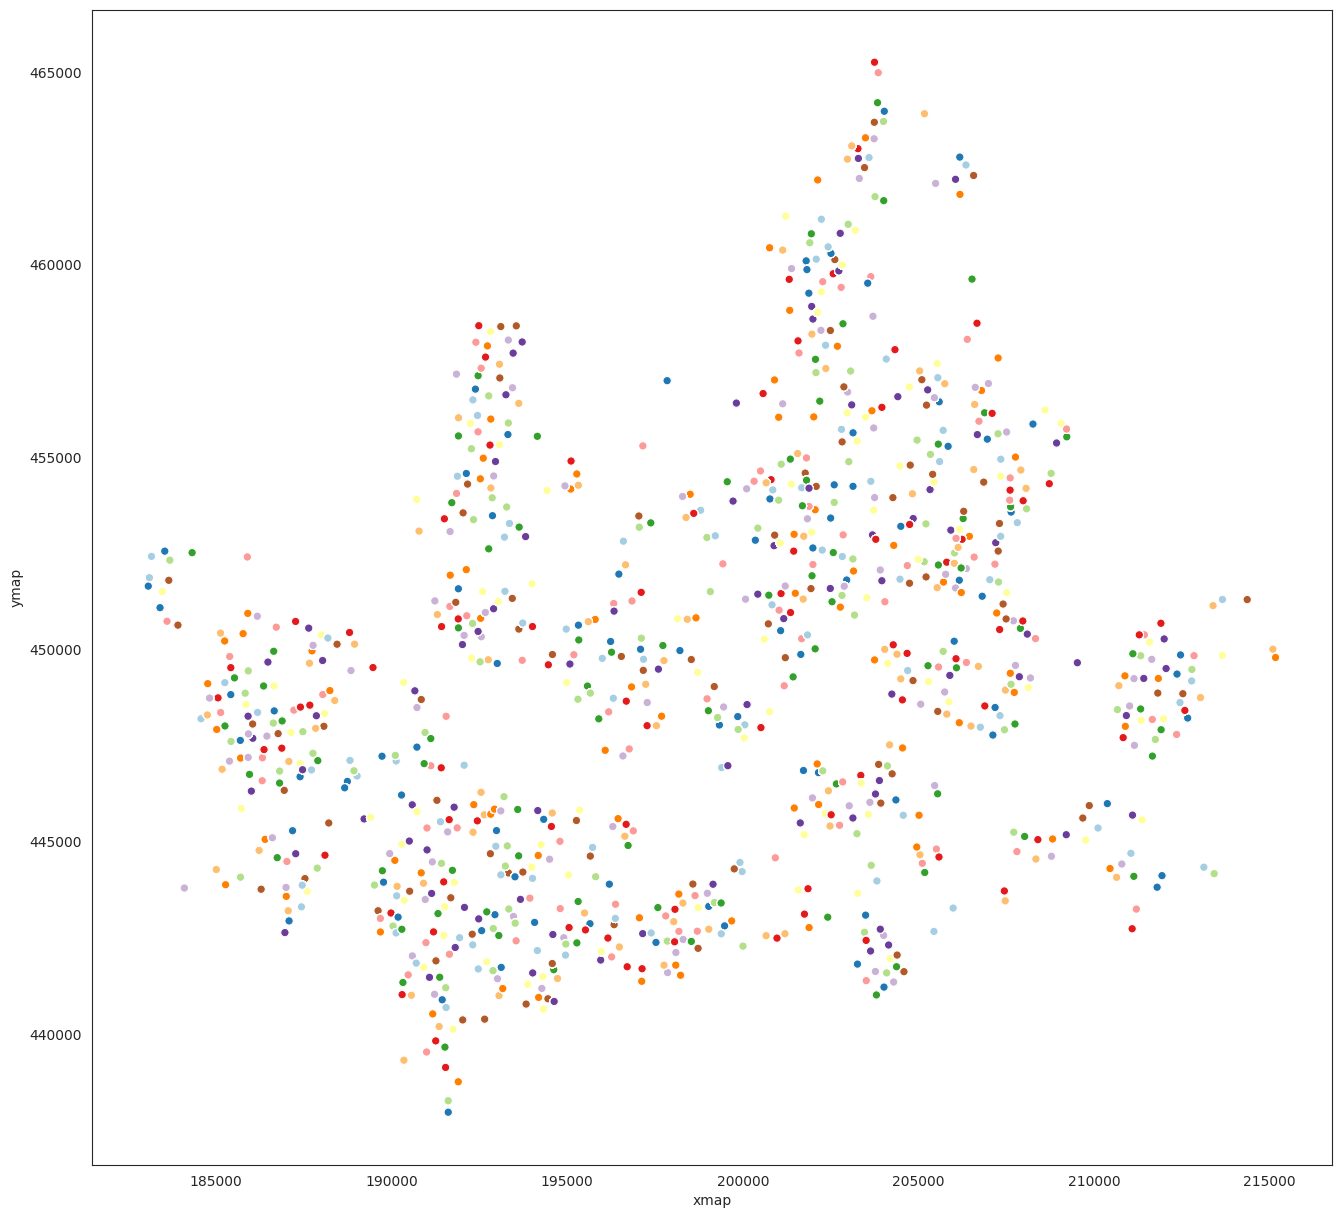

In [58]:
plt.figure(figsize=(16,15))
sns.set_style("white")
sns.scatterplot(x='xmap', 

                y='ymap', 

                hue='district',
                
                legend= False,
                
                palette=sns.color_palette("Paired", n_colors=1007),

                
                
                
                
                data=df_final)
plt.savefig(fname="map_district", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()

### 행정동

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


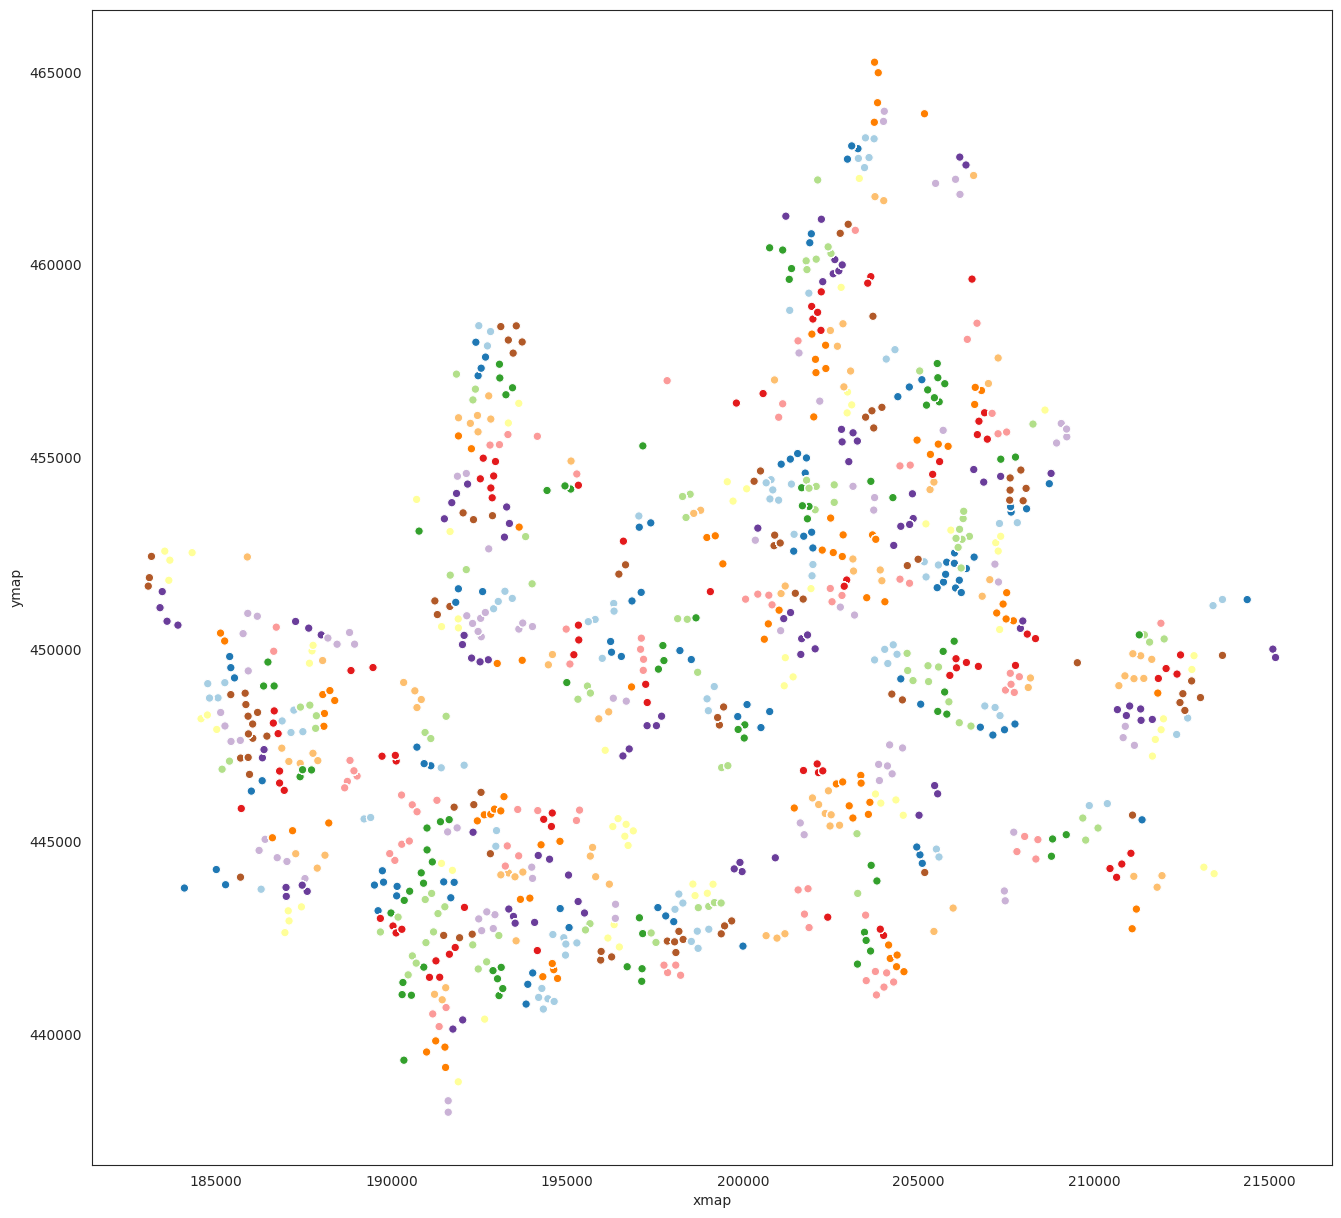

In [59]:
plt.figure(figsize=(16,15))
sns.set_style("white")
sns.scatterplot(x='xmap', 

                y='ymap', 

                hue='H',
                
                legend= False,
                
                palette=sns.color_palette("Paired", n_colors=349),

                
                
                
                
                data=df_final)
plt.savefig(fname="map_H", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()


### 시군구

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


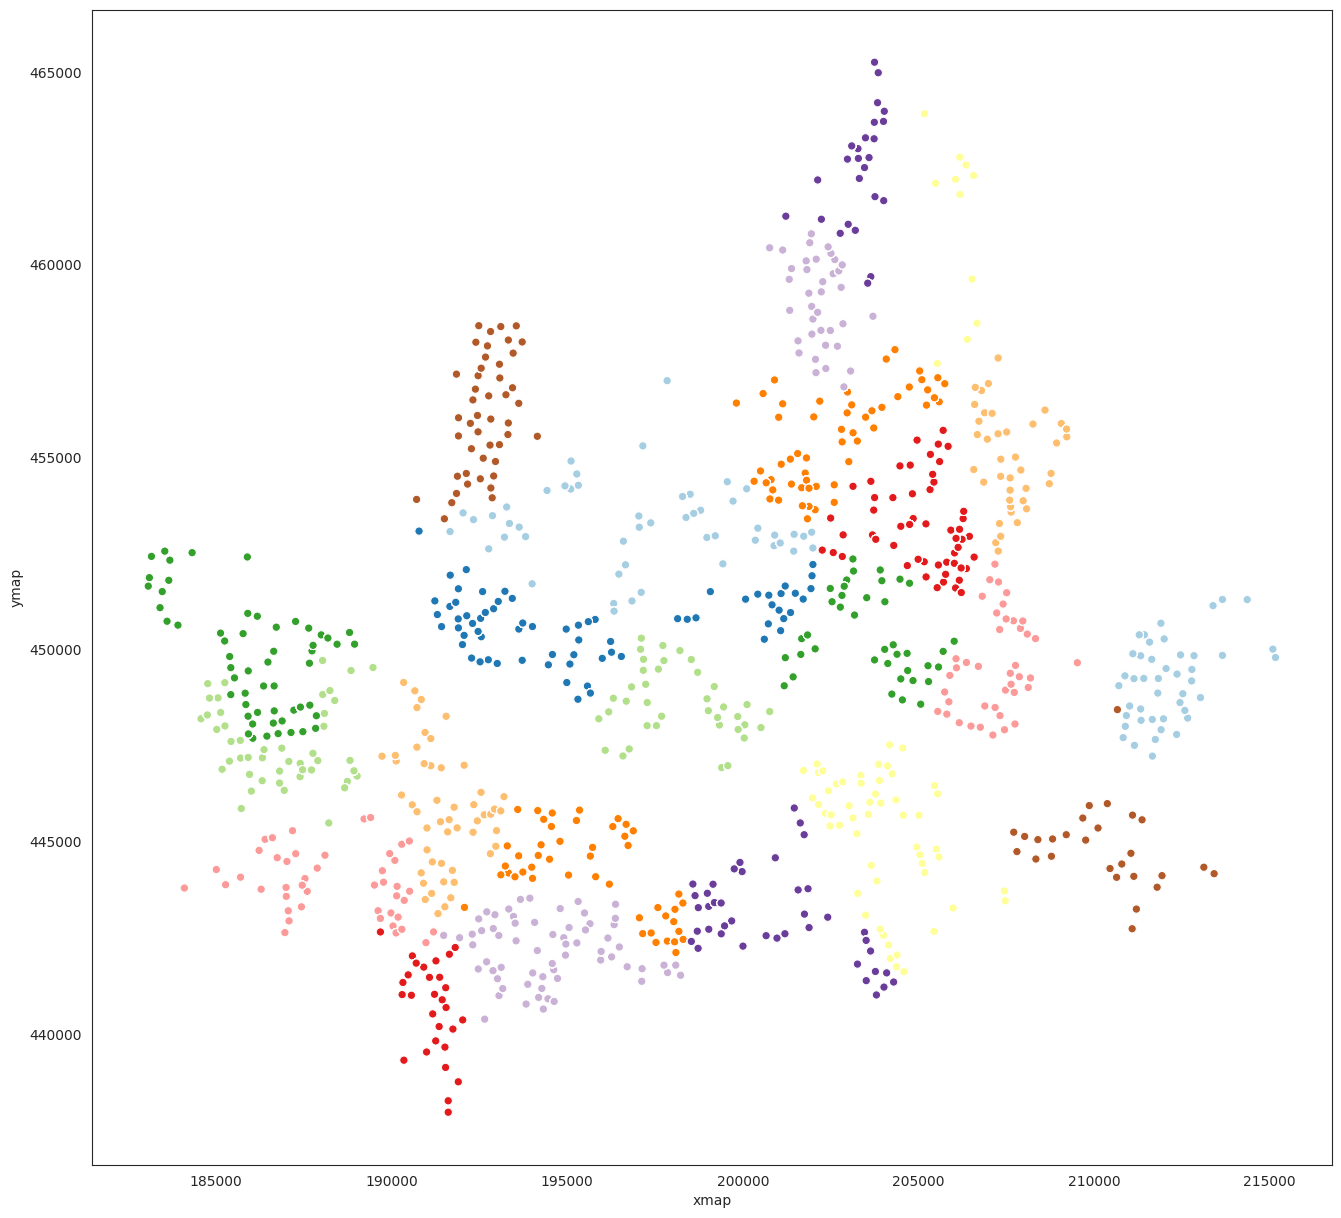

In [60]:
plt.figure(figsize=(16,15))
sns.set_style("white")
sns.scatterplot(x='xmap', 

                y='ymap', 

                hue='C',
                
                legend= False,
                
                palette=sns.color_palette("Paired", n_colors=25),

                
                
                
                
                data=df_final)
plt.savefig(fname="map_C", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()


### k-means

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


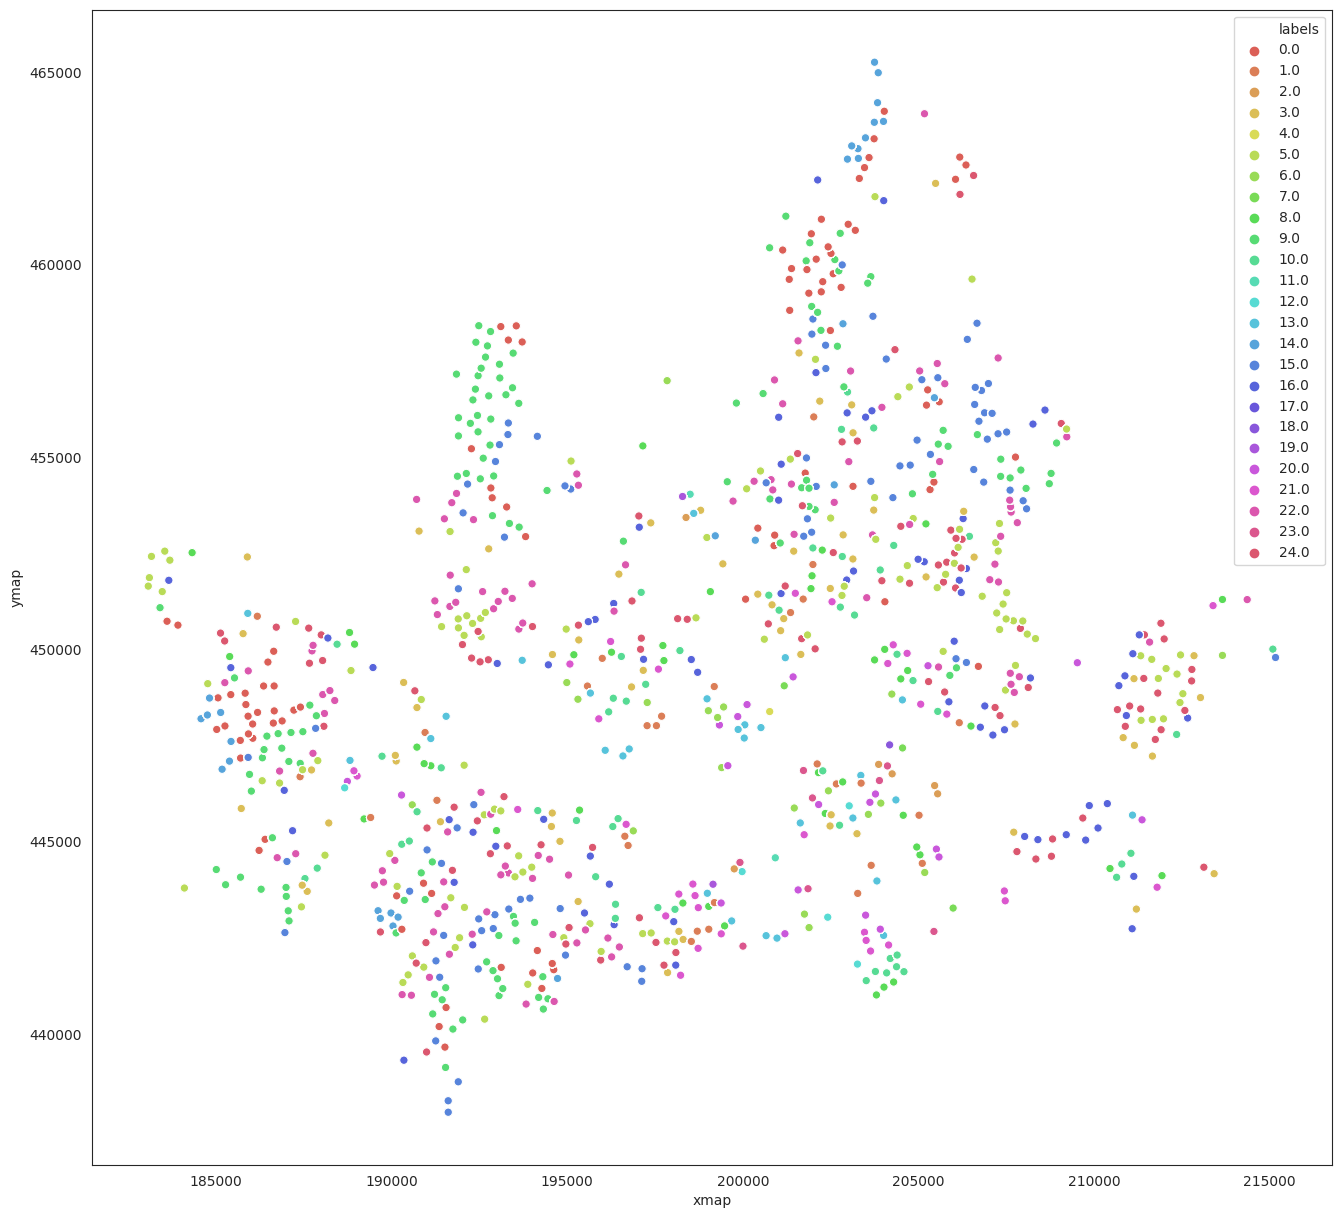

In [61]:
plt.figure(figsize=(16,15))
sns.set_style("white")
sns.scatterplot(x='xmap', 

                y='ymap', 

                hue='labels',
                
                
                palette=sns.color_palette("hls", n_colors=25),

                
                
                
                
                data=df_final)
plt.savefig(fname="map_K", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()


-------------------------------------------------------------------------

## 실험3 클러스터링으로 차원축소 후 회귀분석

### 3.1 K-means + Linear Regression

In [0]:

import pandas as pd 
df = pd.read_csv("df_grouped_rate.csv", encoding ='utf-8')
## 불러온 dataframe에서 상권코드, 연도 제거하기 / 독립 종속 변수 분리하기
y = df[['sales_total']]
X = df.drop(['sales_total', 'district', 'year', 'code'], axis=1)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

R2_k = []
MAE_k = []
MSE_k = []
RMSE_k = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
    kmeans = KMeans(n_clusters=25)
    kmeans.fit(X_train)
    train_labels = kmeans.labels_
    train_lb_df= pd.DataFrame(train_labels, columns=['labels'], dtype=str)
    test_labels = kmeans.predict(X_test)
    test_lb_df= pd.DataFrame(test_labels, columns=['labels'],  dtype=str)
    # 로버스트 스케일링
    rb = RobustScaler()
    Xs_train = pd.DataFrame(rb.fit_transform(X_train)) #연속형 데이터만 스케일링
    Xs_test = pd.DataFrame(rb.transform(X_test))

    X_train = pd.get_dummies(pd.concat([train_lb_df,Xs_train], axis=1))
    X_test = pd.get_dummies(pd.concat([test_lb_df,Xs_test], axis=1))

    # 회귀분석
    regressor = LinearRegression()
    model = regressor.fit(Xs_train, y_train)

    print(i+1,"번째 시도")
    # 정확도 결과값
    print(model.score(Xs_train, y_train))
    print(model.score(Xs_test, y_test))

    # 오차 결과값
    y_pred = model.predict(Xs_test)
    R2_k.append(r2_score(y_test , y_pred))
    MAE_k.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_k.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_k.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)
    print('='*50)

1 번째 시도
0.28171405154876217
0.32759820180174604
2 번째 시도
0.29627718403100245
0.29413586781139167
3 번째 시도
0.29733288547928294
0.29242219850056295
4 번째 시도
0.291568790082009
0.30581276393028956
5 번째 시도
0.2911967426026104
0.3053909304917063
6 번째 시도
0.29100107174529455
0.30760543241361415
7 번째 시도
0.2898832876731935
0.30963206068200344
8 번째 시도
0.2914529001329482
0.3061883971465338
9 번째 시도
0.3028528692673814
0.275591530498539
10 번째 시도
0.29434551789793373
0.2993109291726661


In [64]:
print('R2_k = ',R2_k )
print('MAE_k = ',MAE_k)
print('MSE_k = ',MSE_k )
print('RMSE_k = ',RMSE_k )

R2_k =  [0.32759820180174604, 0.29413586781139167, 0.29242219850056295, 0.30581276393028956, 0.3053909304917063, 0.30760543241361415, 0.30963206068200344, 0.3061883971465338, 0.275591530498539, 0.2993109291726661]
MAE_k =  [707908302.9991953, 702743196.949231, 711042159.8644696, 709238510.9165285, 713575050.235783, 703479198.4511418, 705414516.9662817, 701520476.5515406, 707778610.9932482, 707435452.1058035]
MSE_k =  [1.9158330021961132e+18, 1.781994018779526e+18, 2.0283429968357501e+18, 1.9756102752683387e+18, 2.0995614503372677e+18, 1.8885606038393546e+18, 1.9473740488602045e+18, 1.90497773371335e+18, 1.8236997049666427e+18, 1.8837953857209613e+18]
RMSE_k =  [1384136193.5142486, 1334913487.3764389, 1424199072.0526924, 1405564041.6816087, 1448986352.7091165, 1374249105.453358, 1395483446.2866998, 1380209307.9360645, 1350444262.073279, 1372514257.0191982]


### 3.2 Hierachical Clustering + Linear Regression

![image.png](attachment:image.png)

- 댄드로그램을 보고 클러스터 갯수 결정(8개)

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.cluster import AgglomerativeClustering

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt

import pandas as pd 
df = pd.read_csv("df_grouped_rate.csv", encoding ='utf-8')
df.columns



df.drop(['year', 'district', 'code'], axis=1, inplace =True)

np.random.seed(seed=100)
idx= np.random.uniform(0, df.shape[0], size=50000 )

y=df.iloc[idx,0:1]
X= df.drop(['sales_total'],axis=1)
X=X.iloc[idx]

## 클러스터링
aggcl = AgglomerativeClustering(n_clusters=8)
aggcl.fit(X)

# 클러스터링 데이터로 라벨링하여 기존 상권코드 데이터와 교체
y_pred = aggcl.labels_
y_pred_df= pd.DataFrame(y_pred, columns=['labels'], dtype=str)

X = pd.concat([y_pred_df, X.reset_index(drop=True)],axis=1) # Sales_total 속성은 맞추고자 하는 속성이므로 X에 포함되어서는 안됩니다.

# 더미변수화
X['labels']=X['labels'].astype('object')
X_dum = pd.get_dummies(X)

y=df.iloc[idx,0:1]

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

R2_HC = []
MAE_HC = []
MSE_HC = []
RMSE_HC = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.3) 

    # 로버스트 스케일링
    rb = RobustScaler()
    Xs_train = rb.fit_transform(X_train)
    Xs_test = rb.transform(X_test)

    # 회귀분석
    regressor = LinearRegression()
    model = regressor.fit(Xs_train, y_train)

    print(i+1,"번째 시도")
    # 정확도 결과값

    # 오차 결과값
    y_pred = model.predict(Xs_test)
    R2_HC.append(r2_score(y_test , y_pred))
    MAE_HC.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_HC.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_HC.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)
    print('='*50)

1 번째 시도
2 번째 시도
3 번째 시도
4 번째 시도
5 번째 시도
6 번째 시도
7 번째 시도
8 번째 시도
9 번째 시도
10 번째 시도


In [68]:
print('R2_HC = ',R2_HC)
print('MAE_HC = ',MAE_HC)
print('MSE_HC = ',MSE_HC)
print('RMSE_HC = ',RMSE_HC)

R2_HC =  [0.25204576027436754, 0.3376497618886476, 0.2964995692575333, 0.31580085583787687, 0.29911226813458325, 0.2582768202313487, 0.3207469581503172, 0.3484285981855445, 0.309005702365704, 0.3127619962139787]
MAE_HC =  [715942628.7236068, 718937969.3814905, 711504793.090621, 713199414.7997699, 701560943.1892731, 719338974.3948172, 703157977.2303172, 700927242.0475196, 713709185.7305886, 707012904.6517286]
MSE_HC =  [2.0655224519629084e+18, 1.9322496510574927e+18, 2.078709910987473e+18, 2.0300141051895027e+18, 1.7495099580024696e+18, 2.035489102262512e+18, 1.8329512940050363e+18, 1.932092855752019e+18, 1.9907376572320236e+18, 1.8880304658444675e+18]
RMSE_HC =  [1437192559.1106114, 1390053830.2733073, 1441773182.9200711, 1424785634.8200254, 1322690424.0987267, 1426705681.7236385, 1353865316.0506907, 1389997430.12425, 1410935029.4156084, 1374056209.1284575]


### 3.3 T-SNE + Linear Regression

In [69]:
## 데이터 불러오기
df = pd.read_csv('df_all.csv')
y = df[['sales_total']]
X = df[df.columns[1:]]
X.drop(["year","code","sales_total","district","xmap","ymap","C","H"],axis=1,inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [70]:
from sklearn.metrics import r2_score
R2_lr = []
MAE_lr = []
MSE_lr = []
RMSE_lr = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

    # 로버스트 스케일링
    rb = RobustScaler()
    Xs_train = rb.fit_transform(X_train)
    Xs_test = rb.transform(X_test)

    # 회귀분석
    regressor = LinearRegression()
    model = regressor.fit(Xs_train, y_train)

    print(i+1,"번째 시도")
    # 정확도 결과값
    print(model.score(Xs_train, y_train))
    print(model.score(Xs_test, y_test))

    # 오차 결과값
    y_pred = model.predict(Xs_test)
    R2_lr.append(r2_score(y_test , y_pred))
    MAE_lr.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_lr.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_lr.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)
    print('='*50)

1 번째 시도
0.29152317607358336
0.3122705263385389
2 번째 시도
0.30483428358166786
0.2650632019707586
3 번째 시도
0.2939010128145082
0.30433171216383315
4 번째 시도
0.2920673970776704
0.3101424137035058
5 번째 시도
0.2969333849245339
0.29178783601294644
6 번째 시도
0.2997170831007327
0.27980343445161393
7 번째 시도
0.2833195025862828
0.3367738523721363
8 번째 시도
0.28864501920211505
0.3271617577240119
9 번째 시도
0.30152045414989626
0.27184791283996235
10 번째 시도
0.30343651301905705
0.26980698959224214


In [72]:
print(R2_lr)
print(MAE_lr)
print(MSE_lr)
print(RMSE_lr)

[0.3122705263385389, 0.2650632019707586, 0.30433171216383315, 0.3101424137035058, 0.29178783601294644, 0.27980343445161393, 0.3367738523721363, 0.3271617577240119, 0.27184791283996235, 0.26980698959224214]
[714539433.9252735, 726991930.0986774, 707129895.4960817, 711152018.3684449, 704998064.8605657, 703734856.7188853, 714166494.1064591, 695631802.7039006, 711040463.2563206, 716007468.189618]
[2.018879535571538e+18, 2.3623016001379057e+18, 1.8882024128854815e+18, 1.9920716144444554e+18, 1.9921260466271946e+18, 1.9731088514748244e+18, 2.1015861130732547e+18, 1.7890067237856271e+18, 2.0094755759007706e+18, 2.321946351980713e+18]
[1420872807.6684196, 1536978074.0589325, 1374118776.8477228, 1411407671.243307, 1411426954.0529523, 1404673930.6596477, 1449684832.3250315, 1337537559.7663145, 1417559725.6908686, 1523793408.5632188]


### 3.4 Compare

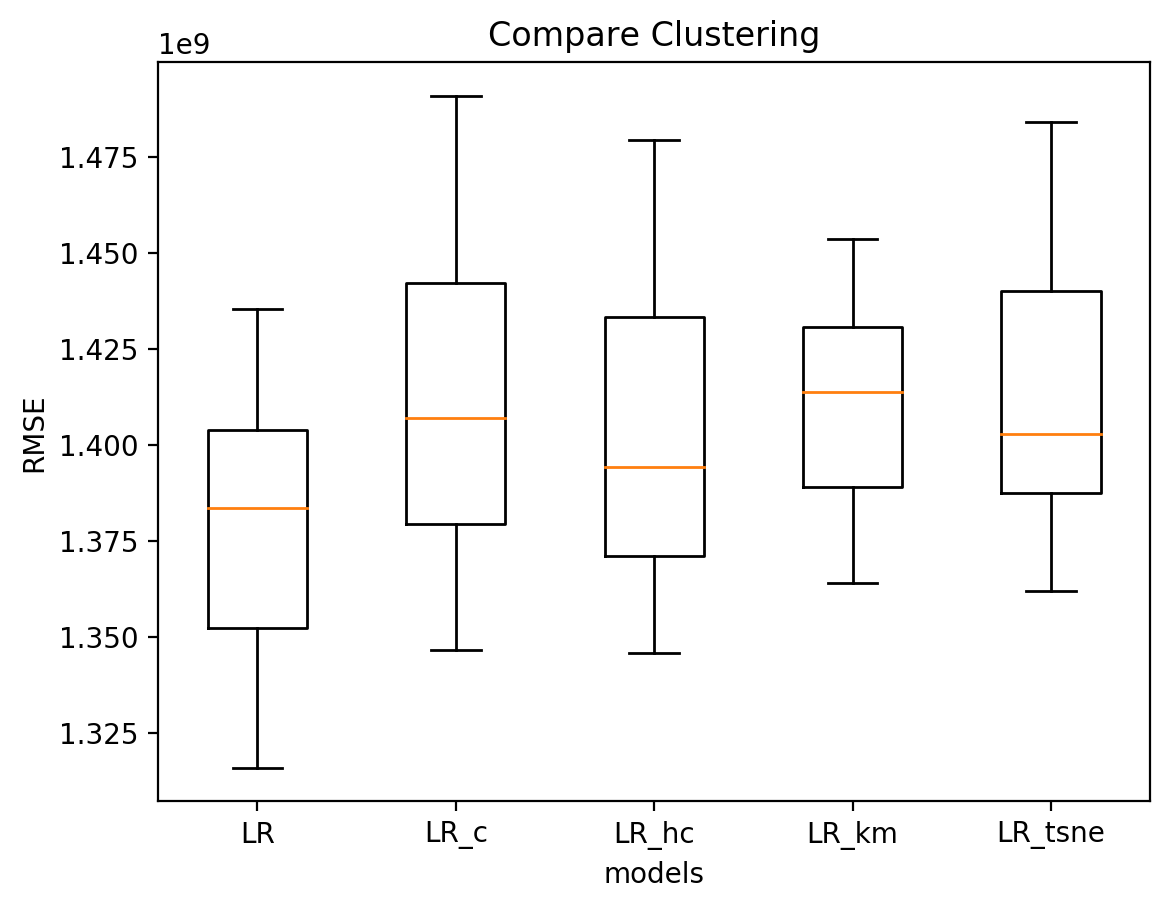

In [0]:
boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot(
    [
     RMSE_lr,
     RMSE_cgoongu,
     RMSE_HC2,
     RMSE_k,
        RMSE_lr_t

     ]
    ,labels=[
     'LR',
     'LR_c',
     'LR_hc',
     'LR_km',
        'LR_tsne'

 ]
    
    )


axes1.set_xlabel('models') 
axes1.set_ylabel('RMSE') 
axes1.set_title('Compare Clustering')
plt.style.use('default')
boxplot.savefig('compare_clustering.png', transparent=True) #png파일로 저장
plt.show()

- Random Forest Regressor 모델을 사용했을 때 최고의 벡터축소 방법 찾기

## 4. Random Forest 비교

### 3.1 상권코드 + Random Forest

In [0]:

from sklearn.ensemble import RandomForestRegressor
## kmeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import metrics
import numpy as np

In [0]:
import pandas as pd 
df = pd.read_csv('df_grouped_rate.csv') #폴더 위치는 상이할 수 있음


y=df.iloc[:,3:4]
X= df.iloc[:,1:].drop(['sales_total','code'],axis=1)
X['district'] = X['district'].astype('object') 

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
import numpy as np
R2_RF = []
MAE_RF = []
MSE_RF = []
RMSE_RF = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    Xs_train = X_train
    Xs_test = X_test
    regr = RandomForestRegressor(n_estimators=50,max_depth=20, n_jobs=-1)
    model=regr.fit(Xs_train, y_train)
    y_pred=model.predict(Xs_test)
    
    print(i+1,"번째 시도")
    # 정확도 결과값
    print(model.score(Xs_train, y_train))
    print(model.score(Xs_test, y_test))

    # 오차 결과값
    R2_RF.append(r2_score(y_test , y_pred))
    MAE_RF.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_RF.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_RF.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)
    print('='*50)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 번째 시도
0.9137105942174446
0.6095253843019532


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


2 번째 시도
0.9173864488084235
0.5911259987213875


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


3 번째 시도
0.9169982627624226
0.6245675008722331


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


4 번째 시도
0.9139277043102872
0.6216600368830747


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


5 번째 시도
0.9197092788758224
0.597162287193161


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


6 번째 시도
0.9141122938260366
0.6050806000085394


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


7 번째 시도
0.9190312665518484
0.6004734815384045


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


8 번째 시도
0.9155572409254652
0.5851565739698305


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


9 번째 시도
0.9137183862740824
0.6051112377518715


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


10 번째 시도
0.9164851217987345
0.6203182024779391


In [76]:
print(R2_RF) 
print(MAE_RF) 
print(MSE_RF) 
print(RMSE_RF) 

[0.6095253843019532, 0.5911259987213875, 0.6245675008722331, 0.6216600368830747, 0.597162287193161, 0.6050806000085394, 0.6004734815384045, 0.5851565739698305, 0.6051112377518715, 0.6203182024779391]
[503211309.9661808, 498937704.03703374, 507788950.2899303, 502481083.4980305, 499959539.3688134, 504658795.988967, 503331912.4193963, 512004751.14601725, 504575429.04539174, 500287198.39092606]
[1.1726422298067172e+18, 1.1348199248117183e+18, 1.1325977651710282e+18, 1.0606710655203789e+18, 1.099750698877469e+18, 1.1901232989535818e+18, 1.1582510460432765e+18, 1.3183188471820055e+18, 1.1445870492364577e+18, 1.0401156043785738e+18]
[1082886065.0164065, 1065279270.8072932, 1064235765.782671, 1029888860.7613828, 1048689991.78855, 1090927723.9824743, 1076220723.663727, 1148180668.3540728, 1069853751.3307405, 1019860580.8533703]


### 3.2 행정구역 + Random Forest

In [0]:
import pandas as pd

df = pd.read_csv("df_grouped_rate.csv", encoding ='utf-8')
cgoongu = pd.read_csv("cgoongoo1.csv", encoding ='utf-8')
df_merged = pd.merge(df, cgoongu, on=['district'])
df_merged.drop(['district','year'], axis=1, inplace =True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
y=df_merged.iloc[:,1:2]
X= df_merged.drop(['sales_total','code'],axis=1)
X['cgoongoo'] = X['cgoongoo'].astype('object') 


In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np 

R2_RF_c = []
MAE_RF_c = []
MSE_RF_c = []
RMSE_RF_c = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    Xs_train = X_train
    Xs_test = X_test
    regr = RandomForestRegressor(n_estimators=50,max_depth=20, n_jobs=-1)
    model=regr.fit(Xs_train, y_train)
    y_pred=model.predict(Xs_test)
    
    print(i+1,"번째 시도")
    # 정확도 결과값
    print(model.score(Xs_train, y_train))
    print(model.score(Xs_test, y_test))

    # 오차 결과값
    R2_RF_c.append(r2_score(y_test , y_pred))
    MAE_RF_c.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_RF_c.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_RF_c.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)
    print('='*50)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 번째 시도
0.9212439833489148
0.5610524978122966


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


2 번째 시도
0.9156850220884873
0.6052588417641755


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


3 번째 시도
0.9157810018210348
0.6004673664823035


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


4 번째 시도
0.9168530431150075
0.6008352269442385


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


5 번째 시도
0.9142024049768439
0.6060946491388775


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


6 번째 시도
0.9169414190745309
0.578463990568785


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


7 번째 시도
0.9179552025864137
0.5659221711926222


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


8 번째 시도
0.9155094265821864
0.5980584517100204


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


9 번째 시도
0.9149098939848356
0.608816604717108


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


10 번째 시도
0.9154682264658341
0.6190745258903725


In [81]:
print(R2_RF_c) 
print(MAE_RF_c) 
print(MSE_RF_c) 
print(RMSE_RF_c) 

# import pickle
# with open('pkl_files/R2_RF_c.pkl', 'wb') as f:
#     pickle.dump(R2_RF_c, f) #피클파일 저장
# with open('pkl_files/MAE_RF_c.pkl', 'wb') as f:
#     pickle.dump(MAE_RF_c, f) #피클파일 저장
# with open('pkl_files/MSE_RF_c.pkl', 'wb') as f:
#     pickle.dump(MSE_RF_c, f) #피클파일 저장

# with open('pkl_files/RMSE_RF_c.pkl', 'wb') as f:
#     pickle.dump(RMSE_RF_c, f) #피클파일 저장

[0.5610524978122966, 0.6052588417641755, 0.6004673664823035, 0.6008352269442385, 0.6060946491388775, 0.578463990568785, 0.5659221711926222, 0.5980584517100204, 0.608816604717108, 0.6190745258903725]
[506517054.74327093, 499054675.42382497, 508170154.2800753, 502348302.5907685, 502830423.4519928, 502219303.9379722, 500565781.32052857, 512456417.0415237, 506841973.56698066, 497824216.98348176]
[1.2029169819177828e+18, 1.1302207616617139e+18, 1.1106769611633391e+18, 1.1491279032245379e+18, 1.1485863709173834e+18, 1.179187055176386e+18, 1.1913869456785275e+18, 1.1068952188162339e+18, 1.1472658511183784e+18, 1.0794498059886568e+18]
[1096775720.8827076, 1063118413.7534792, 1053886597.8668383, 1071973835.1398964, 1071721218.8425605, 1085903796.4646711, 1091506731.8521345, 1052090879.5423682, 1071104967.3670542, 1038965738.6019313]


### 3.3 K-means Clustering + Random Forest

In [0]:
y=df.iloc[:,3:4]
X= df.iloc[:,1:].drop(['sales_total','code'],axis=1)
X['district'] = X['district'].astype('object') 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
kmeans = KMeans(n_clusters=25)
kmeans.fit(X_train)

train_labels = kmeans.labels_
train_lb_df= pd.DataFrame(train_labels, columns=['labels'], dtype=str)
test_labels = kmeans.predict(X_test)
test_lb_df= pd.DataFrame(test_labels, columns=['labels'],  dtype=str)
X_train = pd.concat([train_lb_df.reset_index(drop=True),X_train.reset_index(drop=True)], axis=1)
X_test = pd.concat([test_lb_df.reset_index(drop=True),X_test.reset_index(drop=True)], axis=1)

In [84]:

regr = RandomForestRegressor(n_estimators=50,max_depth=20, n_jobs=-1)
model=regr.fit(X_train, y_train)
y_pred_k=model.predict(X_test)


# # 정확도 결과값
# print(model.score(Xs_train, y_train))
# print(model.score(Xs_test, y_test))

# 오차 결과값
print(r2_score(y_test , y_pred))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


-0.528816549796693
1041724807.4977461
4.3847549171037425e+18
2093980639.1425261


### 3.4 T-sne + Random Forest

In [85]:
## 데이터 불러오기
df = pd.read_csv('df_all.csv')
y = df[['sales_total']]
X = df[df.columns[1:]]
X.drop(["year","code","sales_total","district","xmap","ymap","C","H"],axis=1,inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
R2_RF = []
MAE_RF = []
MSE_RF = []
RMSE_RF = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    Xs_train = X_train
    Xs_test = X_test
    regr = RandomForestRegressor(n_estimators=50,max_depth=20, n_jobs=-1)
    model=regr.fit(Xs_train, y_train)
    y_pred=model.predict(Xs_test)
    
    print(i+1,"번째 시도")
    # 정확도 결과값
    print(model.score(Xs_train, y_train))
    print(model.score(Xs_test, y_test))

    # 오차 결과값
    R2_RF.append(r2_score(y_test , y_pred))
    MAE_RF.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_RF.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_RF.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)
    print('='*50)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1 번째 시도
0.9145482702668755
0.5716057866271764


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


2 번째 시도
0.9133396950760456
0.5770113529742067


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


3 번째 시도
0.9115944616600448
0.575481313052925


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


4 번째 시도
0.9083858027519172
0.5857959254035767


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


5 번째 시도
0.9104515454543912
0.6200997893053112


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


6 번째 시도
0.9136418818200792
0.5924872228749927


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


7 번째 시도
0.9144188255516181
0.545570983528789


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


8 번째 시도
0.9111724829195506
0.6066874889008577


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


9 번째 시도
0.9119483047087498
0.5727846446452463


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


10 번째 시도
0.9133566804535241
0.579758838210457


In [87]:
print(R2_RF) 
print(MAE_RF) 
print(MSE_RF) 
print(RMSE_RF) 

[0.5716057866271764, 0.5770113529742069, 0.575481313052925, 0.5857959254035767, 0.6200997893053111, 0.5924872228749927, 0.545570983528789, 0.6066874889008577, 0.5727846446452463, 0.579758838210457]
[518362253.28107804, 518147212.35671854, 519382483.69864535, 502021435.3487808, 509504626.6407776, 514786082.9471483, 518083221.26596147, 509967899.9430954, 512615466.99837023, 518430584.76749223]
[1.301413172275907e+18, 1.1365094202612596e+18, 1.3078241183836224e+18, 1.1273484091701768e+18, 1.1068672565763032e+18, 1.2412938515602698e+18, 1.304870982355528e+18, 1.138598086570207e+18, 1.188172590268511e+18, 1.191131423353221e+18]
[1140794973.8125196, 1066071958.2942137, 1143601380.8944192, 1061766645.3464136, 1052077590.5684444, 1114133677.5989988, 1142309494.9949107, 1067051117.1308557, 1090033297.7797105, 1091389675.3008163]


### compare RF

In [0]:
R2_RF_k =  [0.6276830942247569, 0.6227219050086259, 0.6074613617205926, 0.607759180370252, 0.6283858605284891, 0.6113629135760819, 0.6216540318341592, 0.593348112915322, 0.6122092835511359, 0.6070386864527917]
MAE_RF_k =  [492331332.51738673, 501241043.5317287, 502445215.580484, 506041214.32808477, 499276514.1318197, 501298782.9700455, 505018874.5552838, 505391611.1989365, 510191128.26462394, 507372316.58571273]
MSE_RF_k =  [1.0010803463214586e+18, 1.0700702132234872e+18, 1.0390394722161436e+18, 1.0510629257786004e+18, 1.0868321966788817e+18, 1.0790707122750404e+18, 1.1099574979953463e+18, 1.2405380961268682e+18, 1.2116018350827996e+18, 1.1339471213799153e+18]
RMSE_RF_k =  [1000540027.345962, 1034441981.5646923, 1019332856.4390258, 1025213600.0749309, 1042512444.3760284, 1038783284.5570054, 1053545204.5334108, 1113794458.6533318, 1100727866.0426471, 1064869532.5625179]

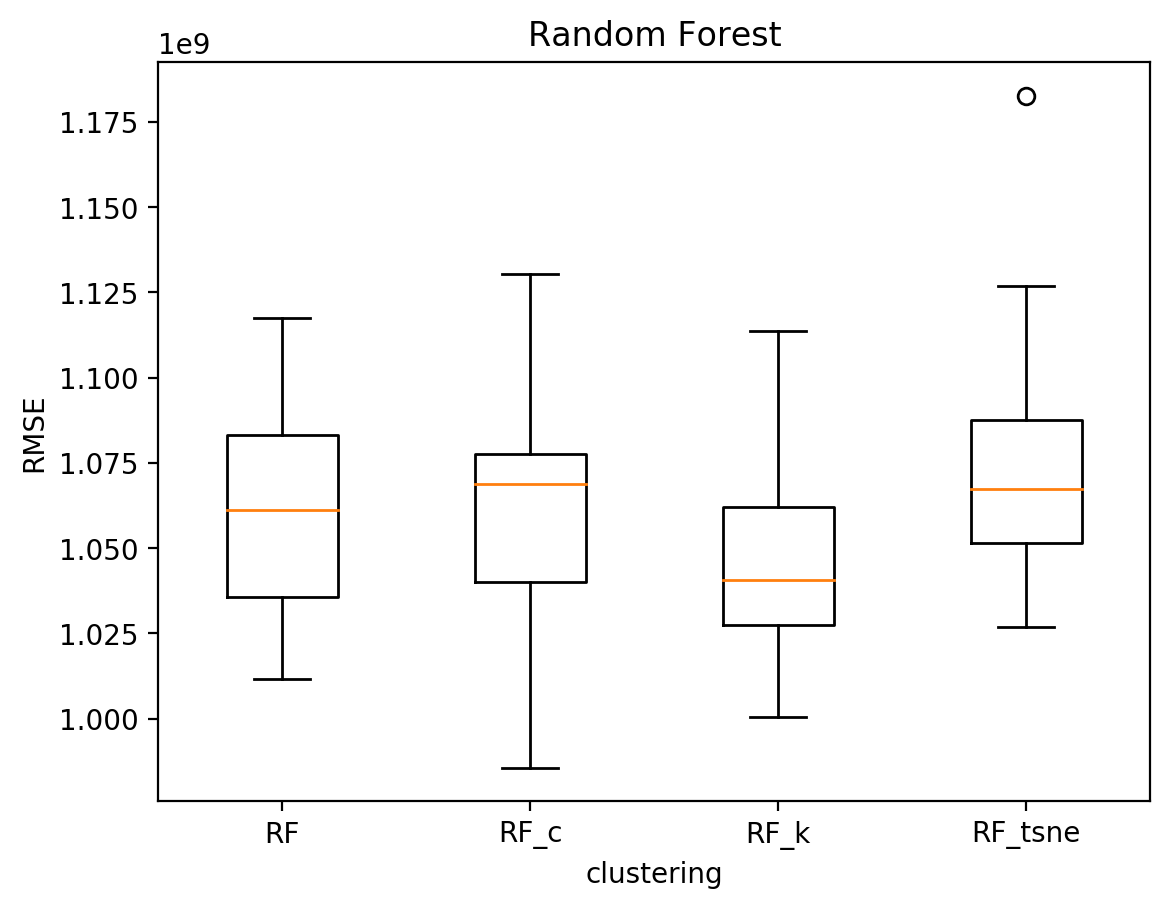

In [0]:
boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot(
    [

     RMSE_RF,
     RMSE_RF_c,
     RMSE_RF_k ,
        RMSE_RF_t,
 
     ]
    ,labels=[
     
     'RF',
     'RF_c',
     'RF_k',
        'RF_tsne',
 
 ]
    
    )


axes1.set_xlabel('clustering') 
axes1.set_ylabel('RMSE') 
axes1.set_title('Random Forest')
plt.style.use('default')
plt.show()